In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

parameters = {
    'axes.labelsize':  14,
    'figure.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
}
plt.rcParams.update(parameters)

In [2]:
def outlier_search(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_outlier = q1 - iqr
    higher_outlier = q3 + iqr

    print(f"Lower outlier margin: {lower_outlier:.1f}")
    print("lowest value in dataset:", data.min())
    print('Number of lower outliers: ', sum(data < lower_outlier), '\n')

    print(f"Higher outlier margin: {higher_outlier:.1f}")
    print("highest value in dataset:", data.max())
    print('Number of higher outliers:', sum(data > higher_outlier))

#### 1.
Загрузите файл HR.csv в pandas dataframe

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 2.
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
numeric_columns = df.loc[:, df.dtypes != 'object'].columns
object_columns = df.loc[:, df.dtypes == 'object'].columns

In [5]:
for col in numeric_columns:
    print('\n*** ', col, '*** :')
    outlier_search(df['satisfaction_level'])


***  satisfaction_level *** :
Lower outlier margin: 0.1
lowest value in dataset: 0.09
Number of lower outliers:  0 

Higher outlier margin: 1.2
highest value in dataset: 1.0
Number of higher outliers: 0

***  last_evaluation *** :
Lower outlier margin: 0.1
lowest value in dataset: 0.09
Number of lower outliers:  0 

Higher outlier margin: 1.2
highest value in dataset: 1.0
Number of higher outliers: 0

***  number_project *** :
Lower outlier margin: 0.1
lowest value in dataset: 0.09
Number of lower outliers:  0 

Higher outlier margin: 1.2
highest value in dataset: 1.0
Number of higher outliers: 0

***  average_montly_hours *** :
Lower outlier margin: 0.1
lowest value in dataset: 0.09
Number of lower outliers:  0 

Higher outlier margin: 1.2
highest value in dataset: 1.0
Number of higher outliers: 0

***  time_spend_company *** :
Lower outlier margin: 0.1
lowest value in dataset: 0.09
Number of lower outliers:  0 

Higher outlier margin: 1.2
highest value in dataset: 1.0
Number of high

Выбросов в численных столбцах не обнаружено

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
for col in object_columns:
    print(df[col].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


Все значения в нечисловых столбцах адекватные, выбросов нет.

In [8]:
df.loc[:, df.dtypes == 'object'].describe()

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


Пропусков нет ни в одном столбце. Возможно, датасет синтетический.

#### 3.
Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [9]:
corr_m = df.corr()
corr_m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


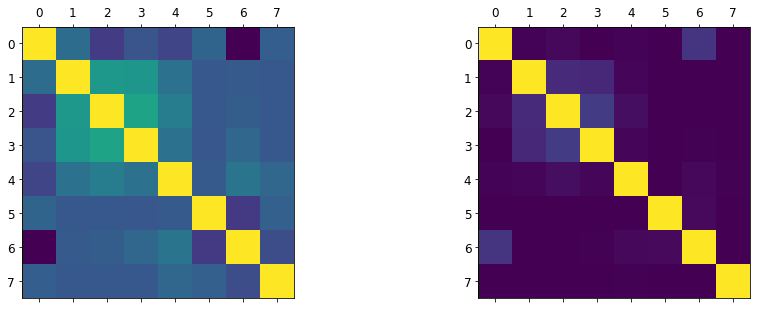

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.matshow(corr_m)
ax2.matshow(corr_m**2)
plt.show()

In [11]:
corr_values = sorted(corr_m.values.ravel(), key=np.abs)
corr_values
for i in [0, 2, -len(corr_m)-1, -len(corr_m) -3]:
    print(corr_m.where(corr_m == corr_values[i]))

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level                    NaN              NaN             NaN   
last_evaluation                       NaN              NaN             NaN   
number_project                        NaN              NaN             NaN   
average_montly_hours                  NaN              NaN             NaN   
time_spend_company                    NaN              NaN             NaN   
Work_accident                         NaN              NaN             NaN   
left                                  NaN              NaN             NaN   
promotion_last_5years                 NaN              NaN             NaN   

                       average_montly_hours  time_spend_company  \
satisfaction_level                      NaN                 NaN   
last_evaluation                         NaN                 NaN   
number_project                          NaN                 NaN   
average_montly_hours         

Наиболее скоррелированные:
corr(average_montly_hours, number_project) = 0.41;
corr(left, satisfaction_level) = -0.39.

Наименее скоррелированные:
corr(time_spend_company, Work_accident) = 0.002120;
corr(average_montly_hours, promotion_last_5years) = -0.003544.

1. Число проектов, в которых участвует сотрудник, и среднее число часов, отработанных за месяц, положительно скоррелированы. К сожалению, корреляция не позволяет сказать, какой из этих факторов является причиной, а какой следствием.
2. У сотрудников покинувших компанию была более низкая удовлетворённость, чем у непокинувших. Если уровень удовлетворённости измерялся только у тех сотрудников, которые не знали о своём скором увольнении, то можно счтать, что низкая удовлетвроённость работой была причиной части увольнений.


3. Интересна очень низкая корреляция между временем, отработанным сотрудником в компании, и его попадением в несчастные случаи. При этом довольно много сотрудников (14%) попадали в несчастные случаи. Видимо, вероятность попасть в несчастный случай не связана с выполнением ежедневных обязанностей на рабочем месте, а причины несчастных случаев -- внешние по отношению к рабочим процессам.
4. Ещё одна интересная низкая корреляция связывает среднее количество часов, отработанных за месяц, и факт повышения в течение последних пяти лет. Видимо, в рассматриваемой компании больше ценят качество работы, чем её количество. 

#### 4.
Рассчитайте сколько сотрудников работает в каждом департаменте.

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64


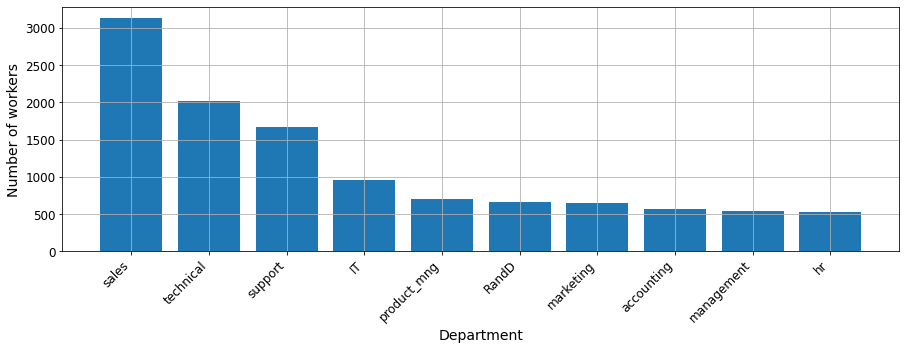

In [12]:
dep_distribution = df[df['left'] == 0].agg('department').value_counts()
print(dep_distribution)

deps_xx = np.arange(len(dep_distribution))
fig, ax = plt.subplots(1, figsize=(15, 5))
fig.autofmt_xdate(rotation=45)
ax.bar(
    x=deps_xx,
    height=dep_distribution.values,
    tick_label=dep_distribution.index,
)
ax.set_xlabel('Department')
ax.set_ylabel('Number of workers')
plt.grid()
plt.show()

В рассматриваемой компании самый большой отдел -- продажники, на втором месте -- технический персонал, на третьем поддержка. IT отдел на четвёртом месте по численности. Возможно, мы имеем дело с продуктовой IT компанией, в которой очень много сотрудников заняты продажей продуктов и поддержекой пользователей.

#### 5.
Показать распределение сотрудников по зарплатам.

low       5144
medium    5129
high      1155
Name: salary, dtype: int64


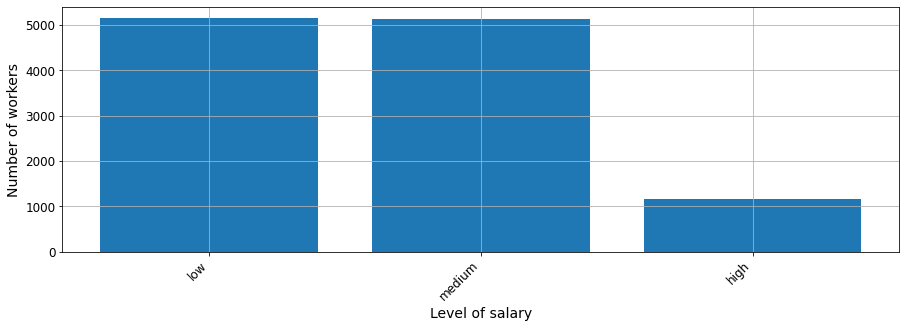

In [13]:
salary_distribution = df[df['left'] == 0].agg('salary').value_counts()
print(salary_distribution)

fig, ax = plt.subplots(1, figsize=(15, 5))
fig.autofmt_xdate(rotation=45)
ax.bar(
    x=list(range(len(salary_distribution))),
    height=salary_distribution.values,
    tick_label=salary_distribution.index,
)
ax.set_xlabel('Level of salary')
ax.set_ylabel('Number of workers')
plt.grid()
plt.show()

In [14]:
1155/len(df[df['left']==0])*100

10.106755337766888

Всего 10% процентов работников имеет высокую зарплату. По 45% работников получают низкую и среднюю зарплаты.

#### 6.
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

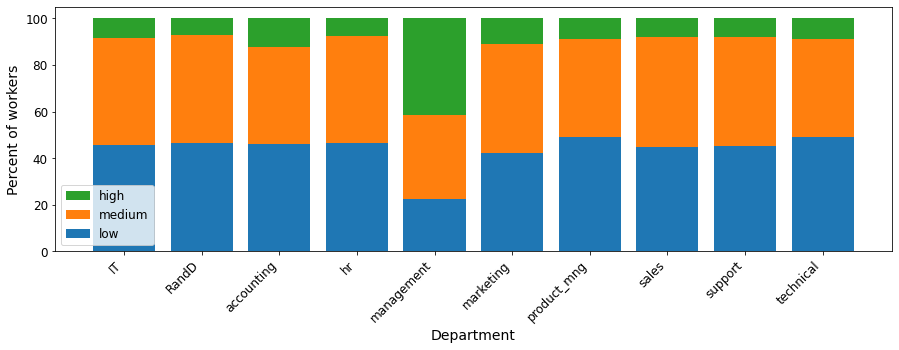

In [15]:
wages = ['low', 'medium', 'high']
salaries_distr = dict()
for salary in wages:
    salaries_distr[salary] = (df
        .loc[(df['left'] == 0) & (df['salary'] == salary)]
        .groupby(['department']).size()
        )

all_salaries = salaries_distr['low'] + salaries_distr['medium'] + salaries_distr['high']
low_salary_percents = salaries_distr['low']/all_salaries*100
medium_salary_percents = salaries_distr['medium']/all_salaries*100
high_salary_percents = salaries_distr['high']/all_salaries*100

fig, ax = plt.subplots(1, figsize=(15, 5))

p1 = ax.bar(deps_xx, low_salary_percents)
p2 = ax.bar(
    deps_xx, medium_salary_percents,
    bottom=low_salary_percents
)
p3 = ax.bar(
    deps_xx, high_salary_percents,
    bottom=low_salary_percents+medium_salary_percents
)


plt.xticks(deps_xx, salaries_distr[salary].index)
plt.legend((p3[0], p2[0], p1[0]), reversed(wages))
ax.set_xlabel('Department')
ax.set_ylabel('Percent of workers')
fig.autofmt_xdate(rotation=45)

Распределение сотрудников по зарплатам внутри всех подразделений, за исключением отдела менеджмента, очень похоже между собой и близко к распределению зарплат среди всего коллектива. Исключение составляет отдел мнеджмента, где 42% сотрудников получает высокую зарплату и только 22% -- низкую.

#### 7.
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [16]:
low_paid_hours = df.loc[df['salary'] == 'low', 'average_montly_hours']
high_paid_hours = df.loc[df['salary'] == 'high', 'average_montly_hours']
print(low_paid_hours.mean(), high_paid_hours.mean())

print(st.bayes_mvs(low_paid_hours, 0.95), '\n')
print(st.bayes_mvs(high_paid_hours, 0.95))
# Variances are significantly different
st.mannwhitneyu(low_paid_hours, high_paid_hours)

200.9965828321487 199.86742118027485
(Mean(statistic=200.9965828321487, minmax=(199.83186536925467, 202.16130029504274)), Variance(statistic=2583.560813910716, minmax=(2499.8377854870505, 2667.283842334382)), Std_dev(statistic=50.82874003859151, minmax=(50.00516042241276, 51.65231965477027))) 

(Mean(statistic=199.86742118027485, minmax=(197.20975090433825, 202.52509145621144)), Variance(statistic=2274.446448725598, minmax=(2095.1985988201172, 2453.694298631079)), Std_dev(statistic=47.69115692374844, minmax=(45.81190024947575, 49.570413598021126)))


MannwhitneyuResult(statistic=4507096.5, pvalue=0.4120665360429347)

Гипотеза не подтвердилась. В рассматриваемой компании и высокооплачиваемые сотрудники и низкооплачиваемые сотрудники работают в серденем по 25 восьмичасовых рабочих дня в месяц.

#### 8.
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

   ##### ● Доля сотрудников с повышением за последние 5 лет;



In [17]:
gdf = df.groupby(['left', 'promotion_last_5years']).agg('count')
gdf

satisfaction_level  last_evaluation  \
left promotion_last_5years                                        
0    0                                   11128            11128   
     1                                     300              300   
1    0                                    3552             3552   
     1                                      19               19   

                            number_project  average_montly_hours  \
left promotion_last_5years                                         
0    0                               11128                 11128   
     1                                 300                   300   
1    0                                3552                  3552   
     1                                  19                    19   

                            time_spend_company  Work_accident  department  \
left promotion_last_5years                                                  
0    0                                   11128          11128       11128   
     1                                     300            300         300   
1    0                                    3552           3552        3552   
     1                                      19             19          19   

                            salary  
left promotion_last_5years          
0    0                       11128  
     1                         300  
1    0                        3552  
     1                          19

In [18]:
gdf = gdf['salary']
promoted_left = gdf[(1, 1)]
all_left = gdf[(1, 0)] + gdf[(1, 1)]

promoted_not_left = gdf[(0, 1)]
all_not_left = gdf[(0, 0)] + gdf[(0, 1)]

print(f'percent of promoted in left group: {promoted_left/all_left*100:.2f}')
print(f'percent of promoted in not left group: {promoted_not_left/all_not_left*100:.2f}')

oddsratio, pvalue = st.fisher_exact(
    [
        [gdf[(0, 0)], gdf[(0, 1)]],
        [gdf[(1, 0)], gdf[(1, 1)]]
    ]
)
print(f'Pvalue is {pvalue:.3f}')

percent of promoted in left group: 0.53
percent of promoted in not left group: 2.63
Pvalue is 0.000


Процент повышенных среди тех, кто покинул компанию в 5 раз ниже, чем серди тех, кто не покинул. Различие этих долей статистически значимо согласно точному тесту Фишера на уровне p<0.001.

##### ● Средняя степень удовлетворенности

In [19]:
print(df.groupby(['left']).agg('mean')['satisfaction_level'])
st.mannwhitneyu(
    df[df['left'] == 0]['satisfaction_level'],
    df[df['left'] == 1]['satisfaction_level']
)

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64


MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

Покинувшие компанию сотрудники имели значительно более низкий уровень удовлетворённости, чем непокинувшие.

##### ● Среднее количество проектов

In [20]:
print(df.groupby(['left']).agg('mean')['number_project'])
st.mannwhitneyu(
    df[df['left'] == 0]['number_project'],
    df[df['left'] == 1]['number_project']
)

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64


MannwhitneyuResult(statistic=19879241.0, pvalue=0.008345878306054643)

Покинувшие компаниию работники в среднем участвовали в большем количестве проектов. Разница между уволившимися и оставшимися порядка двух процетнов, но она статистически значима в соответсвии с тестом Мана-Уитни за уровне p=0.008.

Однако, этот результат может быть объяснён автокорреляцией. Известно, что в среднем покинувшие компанию сотрудники успевали проработать в ней более длительное время. За это более длительное время они успевали поучаствовать в большем количестве проектов.

In [24]:
print(df.groupby(['left']).agg('mean')['time_spend_company'])
st.mannwhitneyu(
    df[df['left'] == 0]['time_spend_company'],
    df[df['left'] == 1]['time_spend_company']
)

left
0    3.380032
1    3.876505
Name: time_spend_company, dtype: float64


MannwhitneyuResult(statistic=13331224.0, pvalue=4.330385960458912e-238)

Уволившиеся сотрудники в среднем прорабатывали в компании больше, чем ещё неуволившиеся. Возможно, неуволившиеся ещё просто не проработали некоторое критическое время.

In [53]:
mapper = {0: 'low', 1: 'medium', 2: 'high'}
nomvar = df['salary'].replace(mapper)


df['salary_coded'] = nomvar
st.mannwhitneyu(
   df[df['left'] == 1]['salary_coded'],
   df[df['left'] == 0]['salary_coded']
)

MannwhitneyuResult(statistic=19815628.5, pvalue=0.0018148053195891972)

In [121]:
df['salary_coded'] = nomvar.factorize()[0]
print(df.groupby('left').mean()['salary_coded'])
del df['salary_coded']

left
0    0.650945
1    0.414730
Name: salary_coded, dtype: float64


Уволившиеся также получали меньшую зарплату.

#### 9.
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [137]:
# df no objects
df_no = df.drop(labels = (df.loc[:, df.dtypes == 'object'].columns), axis=1) 
df_no.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [138]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_no, test_size=0.2, random_state=18)

y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
lda.predict(data_test)
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy = ', accuracy_score(result[0], result[1]))
print(accuracy_score(df['left'], np.zeros(len(df))))
cm = confusion_matrix(y_test, lda.predict(data_test), labels=[0, 1])


Accuracy =  0.769
0.7619174611640777


Точность модели почти такая же, как если бы мы всех людей сочли оставшимися в компании.

In [125]:
print('         Success,    Misses,  % of misses ')
print(f'Not_left   {cm[0][0]}       {cm[0][1]}         {cm[0][1]/cm[0].sum()*100:.1f}')
print(f'Left       {cm[1][0]}        {cm[1][1]}         {cm[1][1]/cm[1].sum()*100:.1f}')

         Success,    Misses,  % of misses 
Not_left   2134       177         7.7
Left       516        173         25.1


Однако модель смогла найти 75% уволившихся. Модель лучше справляется с угадыванием тех, кто не покинул компанию. Это выглядит логично, потомучто в датасете больше примером тех, кто не уволился.

Попробуем добавить в модель данные по зарплатам.

In [133]:
df_no = df_no.join(pd.get_dummies(nomvar))

data_train, data_test = train_test_split(df_no, test_size=0.2, random_state=18)

y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
lda.predict(data_test)
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy = ', accuracy_score(result[0], result[1]))

cm = confusion_matrix(y_test, lda.predict(data_test), labels=[0, 1])

Accuracy =  0.7806666666666666


In [134]:
print('         Success,    Misses,  % of misses ')
print(f'Not_left   {cm[0][0]}       {cm[0][1]}         {cm[0][1]/cm[0].sum()*100:.1f}')
print(f'Left       {cm[1][0]}        {cm[1][1]}         {cm[1][1]/cm[1].sum()*100:.1f}')

         Success,    Misses,  % of misses 
Not_left   2130       181         7.8
Left       477        212         30.8


Теперь модель нашла только 70% уволившихся. При это несколько возросла общая точность. Произошло переобучение?